Import the required libraries we need for the lab:

In [0]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

Read the dataset in the csv file from the URL:

In [0]:
import pandas as pd
boston_df=pd.read_csv("/dbfs/mnt/dcdp2023/Data/boston_housing.csv")

A quick look at the data's shape:

In [0]:
boston_df.shape

Out[128]: (506, 14)

A more detailed look at the data:

In [0]:
boston_df.info 

Out[129]: <bound method DataFrame.info of      Unnamed: 0  CRIM    ZN  INDUS  CHAS  ...  RAD    TAX  PTRATIO  LSTAT  MEDV
0             0  0.01 18.00   2.31  0.00  ... 1.00 296.00    15.30   4.98 24.00
1             1  0.03  0.00   7.07  0.00  ... 2.00 242.00    17.80   9.14 21.60
2             2  0.03  0.00   7.07  0.00  ... 2.00 242.00    17.80   4.03 34.70
3             3  0.03  0.00   2.18  0.00  ... 3.00 222.00    18.70   2.94 33.40
4             4  0.07  0.00   2.18  0.00  ... 3.00 222.00    18.70   5.33 36.20
..          ...   ...   ...    ...   ...  ...  ...    ...      ...    ...   ...
501         501  0.06  0.00  11.93  0.00  ... 1.00 273.00    21.00   9.67 22.40
502         502  0.05  0.00  11.93  0.00  ... 1.00 273.00    21.00   9.08 20.60
503         503  0.06  0.00  11.93  0.00  ... 1.00 273.00    21.00   5.64 23.90
504         504  0.11  0.00  11.93  0.00  ... 1.00 273.00    21.00   6.48 22.00
505         505  0.05  0.00  11.93  0.00  ... 1.00 273.00    21.00   7.88 11.9

Let's see some descriptive statistics from the dataset:

In [0]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,252.50,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,12.65,22.53
std,146.21,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,7.14,9.20
min,0.00,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,1.73,5.00
25%,126.25,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,6.95,17.02
50%,252.50,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,11.36,21.20
75%,378.75,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,16.96,25.00
max,505.00,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,37.97,50.00


Let's see the first few rows as a table:

In [0]:
boston_df.head() 

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,4.98,24.00
1,1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,9.14,21.60
2,2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,4.03,34.70
3,3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,2.94,33.40
4,4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,5.33,36.20


Display all the unique values under the 'Unnamed: 0' column:

In [0]:
boston_df['Unnamed: 0'].unique() 

Out[132]: array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 17

Count the *total* number of values under the 'Unnamed: 0' column:

In [0]:
boston_df['Unnamed: 0'].count() 

Out[133]: 506

Count the number of *unique* values under the 'Unnamed: 0' column:

In [0]:
boston_df['Unnamed: 0'].nunique() 

Out[134]: 506

The results are equal (506 = 506). This establishes there's only one observation per sample (independent samples).

All values under the 'Unnamed: 0' column are unique (the column is redundant), so I'll drop the column:

In [0]:
boston_df.drop('Unnamed: 0',axis=1,inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,5.33,36.20


Create a categorical data column from the dummy variable 'CHAS' column:

In [0]:
boston_df.loc[(boston_df['CHAS'] == 0.0), 'CHAS_Categorical'] = 'No' # Encode dummy variable value 0.0 to 'No'
boston_df.loc[(boston_df['CHAS'] == 1.0), 'CHAS_Categorical'] = 'Yes' # Encode dummy variable value 1.0 to 'Yes'
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHAS_Categorical
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,4.98,24.00,No
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,9.14,21.60,No
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,4.03,34.70,No
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,2.94,33.40,No
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,5.33,36.20,No


Move the categorical 'CHAS' column next to the dummy variable 'CHAS' column:

In [0]:
boston_df.insert(boston_df.columns.get_loc('CHAS')+1,'CHAS_Categorical',boston_df.pop('CHAS_Categorical'))
boston_df.head()

,CRIM,ZN,INDUS,CHAS,CHAS_Categorical,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,No,0.54,6.58,65.20,4.09,1.00,296.00,15.30,4.98,24.00
1,0.03,0.00,7.07,0.00,No,0.47,6.42,78.90,4.97,2.00,242.00,17.80,9.14,21.60
2,0.03,0.00,7.07,0.00,No,0.47,7.18,61.10,4.97,2.00,242.00,17.80,4.03,34.70
3,0.03,0.00,2.18,0.00,No,0.46,7.00,45.80,6.06,3.00,222.00,18.70,2.94,33.40
4,0.07,0.00,2.18,0.00,No,0.46,7.15,54.20,6.06,3.00,222.00,18.70,5.33,36.20


###### Question: Is there a significant difference in 'MEDV' WRT 'CHAS'?

To answer this, I'll run a t-test for independent samples.

For a valid t-test, the following assumptions must be met:  
- One independent, categorical 2-level variable: yes ('CHAS')  
- One dependent continuous variable: yes ('MEDV')  
- Independence of observations: each subject belongs to only one group--there is no relationship btwn observations in each group: yes (verified above)  
- Dependent variable follows a normal distribution: yes (verified below)

I'll plot 'MEDV' in a histogram to see if it follows a normal distribution:

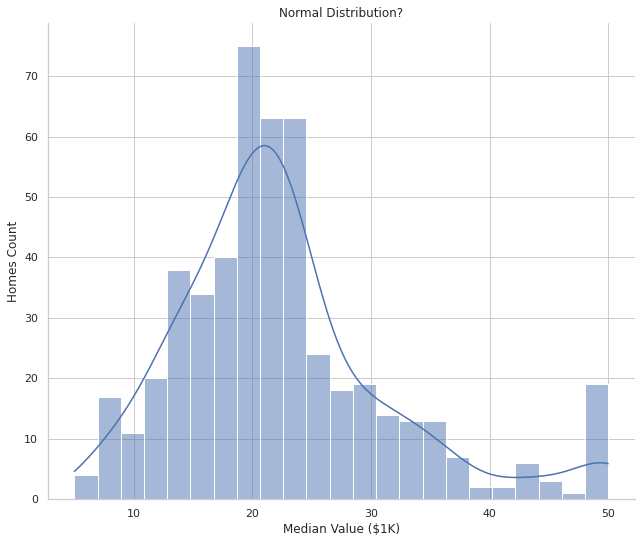

In [0]:
sns.displot(boston_df['MEDV'], kde = True)
plt.title("Normal Distribution?")
plt.xlabel('Median Value ($1K)')
plt.ylabel('Homes Count')
plt.gcf().set_size_inches(10,8)
plt.show()

Close enough IMO.

Before I run the t-test, I'll need to run a Levene's test for homogeneity (equality) of variance:

In [0]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center='mean')

Out[139]: LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than than 0.05, we will NOT assume equality of variance.

Hypothesis:  
- H_0: u_1 == u_2 (There's no difference in 'MEDV' WRT 'CHAS')  
- H_1: u_1 != u_2 (There is a difference in 'MEDV' WRT 'CHAS')

Here goes the t-test:

In [0]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var=False)

Out[140]: Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

Since the p-value is less than alpha value 0.05, we reject the null hypothesis.
###### Conclusion: There IS a difference in 'MEDV' WRT 'CHAS'.

Display a bar plot:

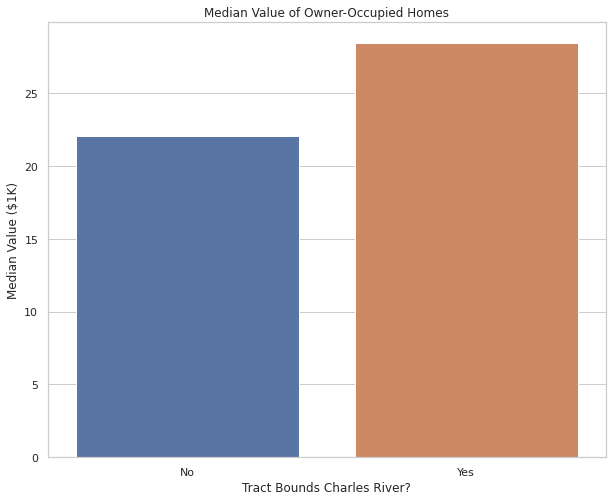

In [0]:
boston_medv = boston_df.groupby('CHAS_Categorical')[['MEDV']].mean().reset_index()
sns.set(style="whitegrid")
sns.barplot(x='CHAS_Categorical', y='MEDV', data=boston_medv, order=['No','Yes']) # (Force homes that do not bound the river to the left on the plot
plt.title("Median Value of Owner-Occupied Homes")
plt.xlabel('Tract Bounds Charles River?')
plt.ylabel('Median Value ($1K)')
plt.gcf().set_size_inches(10,8)
plt.show()

Display a box plot:

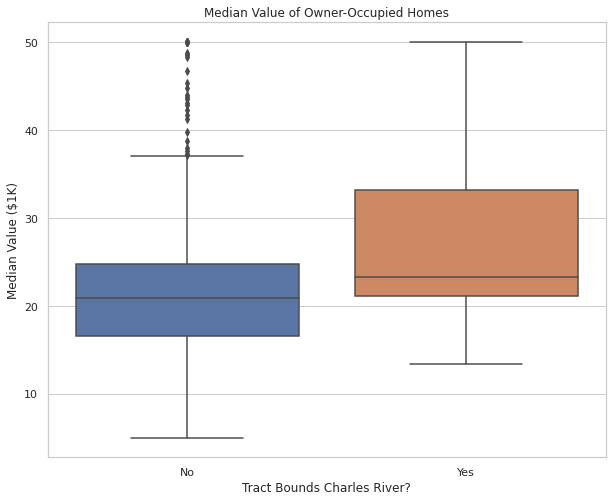

In [0]:
sns.boxplot(x='CHAS_Categorical', y='MEDV', data=boston_df, order=['No','Yes']) # (Force homes that do not bound the river to the left on the plot
sns.set(style="whitegrid")
plt.title("Median Value of Owner-Occupied Homes")
plt.xlabel('Tract Bounds Charles River?')
plt.ylabel('Median Value ($1K)')
plt.gcf().set_size_inches(10,8)
plt.show()

These visualizations support our conclusion: tracts bounding the river do appear to have higher median values.

###### Next question: Is there a significant difference in 'MEDV' WRT 'AGE'?
To answer this, I'll run a one-way ANOVA.  

For a valid one-way ANOVA, the following assumptions must be met:  
- The samples are independent: yes (verified previously)  
- Each sample is from a normally distributed population: yes (verified below)  
- The population standard deviations of the groups are all equal: yes (verified below)

First, I'll discretize the 'AGE' variable into a new column 'AGE_group':

In [0]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_group'] = '<=35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_group'] = '35-70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_group'] = '70+'
boston_df.head()

,CRIM,ZN,INDUS,CHAS,CHAS_Categorical,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_group
0,0.01,18.00,2.31,0.00,No,0.54,6.58,65.20,4.09,1.00,296.00,15.30,4.98,24.00,35-70
1,0.03,0.00,7.07,0.00,No,0.47,6.42,78.90,4.97,2.00,242.00,17.80,9.14,21.60,70+
2,0.03,0.00,7.07,0.00,No,0.47,7.18,61.10,4.97,2.00,242.00,17.80,4.03,34.70,35-70
3,0.03,0.00,2.18,0.00,No,0.46,7.00,45.80,6.06,3.00,222.00,18.70,2.94,33.40,35-70
4,0.07,0.00,2.18,0.00,No,0.46,7.15,54.20,6.06,3.00,222.00,18.70,5.33,36.20,35-70


I'll go ahead and move the 'AGE_group' column next to the 'AGE' column:

In [0]:
boston_df.insert(boston_df.columns.get_loc('AGE')+1,'AGE_group',boston_df.pop('AGE_group'))
boston_df.head()

,CRIM,ZN,INDUS,CHAS,CHAS_Categorical,NOX,RM,AGE,AGE_group,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,No,0.54,6.58,65.20,35-70,4.09,1.00,296.00,15.30,4.98,24.00
1,0.03,0.00,7.07,0.00,No,0.47,6.42,78.90,70+,4.97,2.00,242.00,17.80,9.14,21.60
2,0.03,0.00,7.07,0.00,No,0.47,7.18,61.10,35-70,4.97,2.00,242.00,17.80,4.03,34.70
3,0.03,0.00,2.18,0.00,No,0.46,7.00,45.80,35-70,6.06,3.00,222.00,18.70,2.94,33.40
4,0.07,0.00,2.18,0.00,No,0.46,7.15,54.20,35-70,6.06,3.00,222.00,18.70,5.33,36.20


Now I'll confirm samples from each group follow a normal distribution.

Make a new dataframe for the <=35 group:

In [0]:
thirtyfive_and_under_df = boston_df.copy()
indexAge = thirtyfive_and_under_df[ (thirtyfive_and_under_df['AGE_group'] != '<=35') ].index
thirtyfive_and_under_df.drop(indexAge, inplace=True)

Plot <=35 'MEDV' in a histogram to see if it follows a normal distribution:

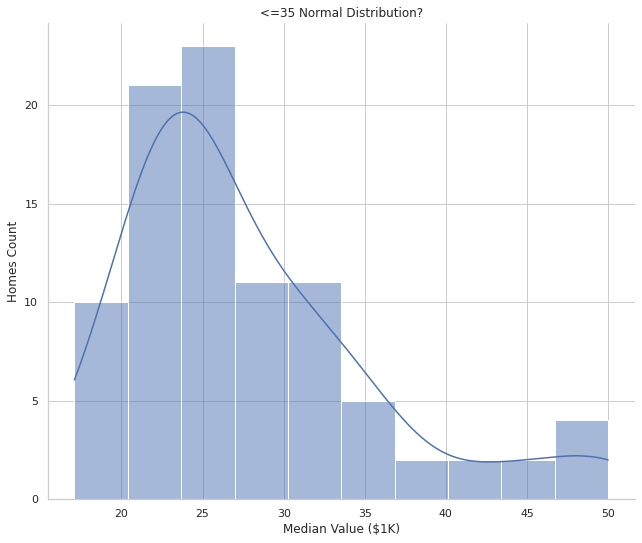

In [0]:
sns.displot(thirtyfive_and_under_df['MEDV'], kde = True)
plt.title("<=35 Normal Distribution?")
plt.xlabel('Median Value ($1K)')
plt.ylabel('Homes Count')
plt.gcf().set_size_inches(10,8)
plt.show()

Make a new dataframe for the 35-70 group:

In [0]:
thirtyfive_to_70_df = boston_df.copy()
indexAge = thirtyfive_to_70_df[ (thirtyfive_to_70_df['AGE_group'] != '35-70') ].index
thirtyfive_to_70_df.drop(indexAge, inplace=True)

Plot 35-70 'MEDV' in a histogram to see if it follows a normal distribution:

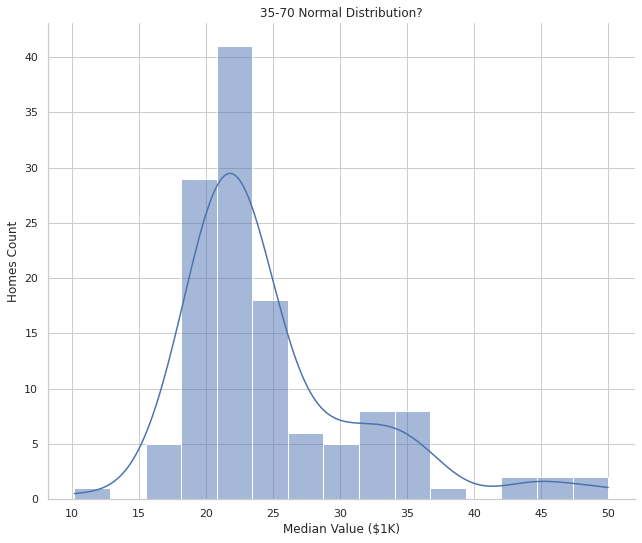

In [0]:
sns.displot(thirtyfive_to_70_df['MEDV'], kde = True)
plt.title("35-70 Normal Distribution?")
plt.xlabel('Median Value ($1K)')
plt.ylabel('Homes Count')
plt.gcf().set_size_inches(10,8)
plt.show()

Make a new dataframe for the 70+ group:

In [0]:
seventy_and_over_df = boston_df.copy()
indexAge = seventy_and_over_df[ (seventy_and_over_df['AGE_group'] != '70+') ].index
seventy_and_over_df.drop(indexAge, inplace=True)

Plot 70+ 'MEDV' in a histogram to see if it follows a normal distribution:

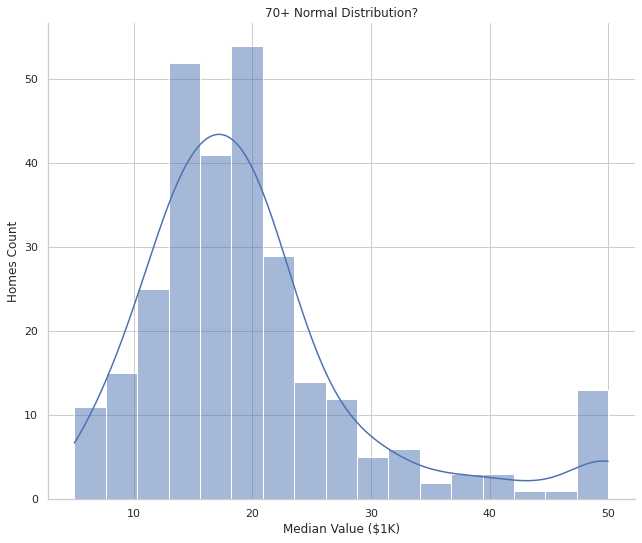

In [0]:
sns.displot(seventy_and_over_df['MEDV'], kde = True)
plt.title("70+ Normal Distribution?")
plt.xlabel('Median Value ($1K)')
plt.ylabel('Homes Count')
plt.gcf().set_size_inches(10,8)
plt.show()

Each sample appears to come from a normally distrubuted population.

Now I'll confirm the population standard deviations of the groups are all equal using Levene's test:

In [0]:
scipy.stats.levene(boston_df[boston_df['AGE_group'] == '<=35']['MEDV'],
                   boston_df[boston_df['AGE_group'] == '35-70']['MEDV'], 
                   boston_df[boston_df['AGE_group'] == '70+']['MEDV'], 
                   center='mean')

Out[151]: LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is greater than than 0.05, we can assume equality of variance.

Hypothesis:
- H_0: u_1 == u_2 == u_3 (There's no difference in 'MEDV' WRT 'AGE_group')
- H_1: at least one of the means differs (There is a difference in 'MEDV' WRT 'AGE_group')

First, separate the three samples (one for each 'AGE_group') into a variable each:

In [0]:
thirtyfive_and_under = boston_df[boston_df['AGE_group'] == '<=35']['MEDV']
thirtyfive_to_70 = boston_df[boston_df['AGE_group'] == '35-70']['MEDV']
seventy_and_over = boston_df[boston_df['AGE_group'] == '70+']['MEDV']

Now, run a one-way ANOVA:

In [0]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_and_under, thirtyfive_to_70, seventy_and_over)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Since the p-value is less than alpha value 0.05, we reject the null hypothesis.
###### Conclusion: There IS a difference in 'MEDV' WRT 'AGE_group'.

Display a box plot:

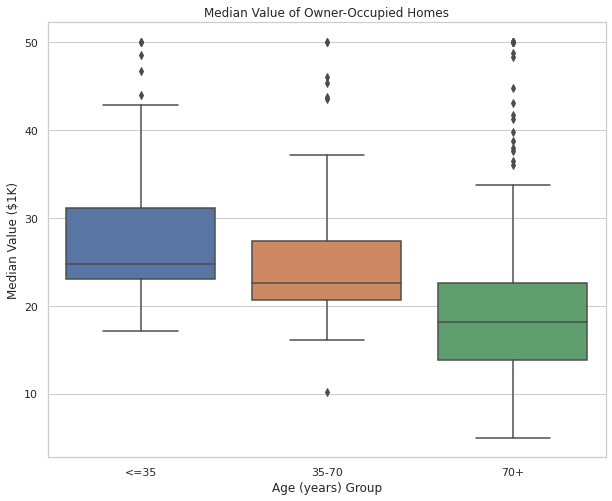

In [0]:
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, order=['<=35','35-70','70+']) # (Display groups L-R in order of ascending age)
sns.set(style="whitegrid")
plt.title("Median Value of Owner-Occupied Homes")
plt.xlabel('Age (years) Group')
plt.ylabel('Median Value ($1K)')
plt.gcf().set_size_inches(10,8)
plt.show()

This visualization supports our conclusion: there IS a difference in the median values of houses relative to house age group.

###### Next question: Can we conclude there's no relationship between 'NOX' and 'INDUS'?

To answer this, I'll produce a scatter plot and run a Pearson correlation test.

Display a scatter plot:

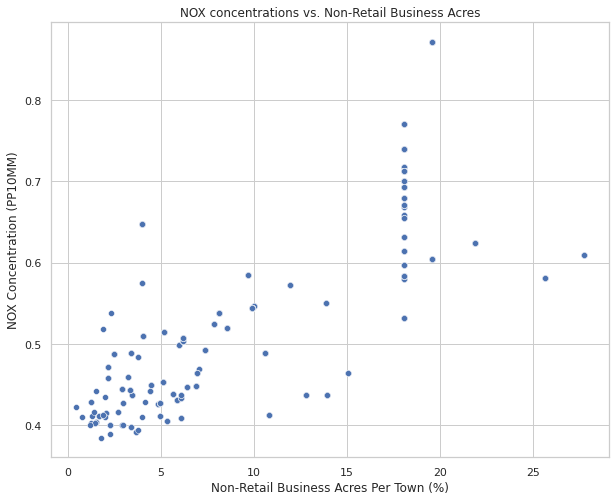

In [0]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title("NOX concentrations vs. Non-Retail Business Acres")
plt.xlabel('Non-Retail Business Acres Per Town (%)')
plt.ylabel('NOX Concentration (PP10MM)')
plt.gcf().set_size_inches(10,8)
plt.show()

'NOX' appears to trend upwards as 'INDUS' increases.

Hypothesis:
- H_0: u_1 == u_2 (There's no difference in 'NOX' WRT 'INDUS')
- H_1: u_1 != u_2 (There is a difference in 'NOX' WRT 'INDUS')

Here goes the Pearson correlation test:

In [0]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

Out[156]: (0.7636514469209151, 7.913361061238693e-98)

Since the p-value (7.91e-98) is less than alpha value 0.05, we reject the null hypothesis.
###### Conclusion: There IS a difference in 'NOX' WRT 'INDUS'.

###### Final question: Is there a significant difference in 'MEDV' WRT 'DIS'?

To answer this, I'll produce a scatter plot, run a regression model AND--just out of curiosity--a Pearson correlation test.

Display a scatter plot:

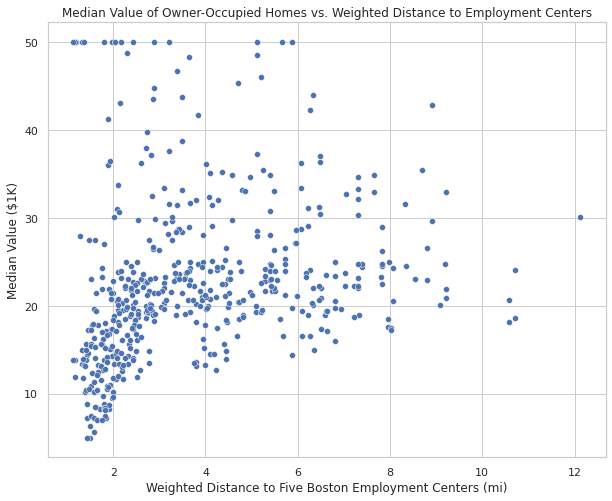

In [0]:
sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
plt.title("Median Value of Owner-Occupied Homes vs. Weighted Distance to Employment Centers")
plt.xlabel('Weighted Distance to Five Boston Employment Centers (mi)')
plt.ylabel('Median Value ($1K)')
plt.gcf().set_size_inches(10,8)
plt.show()

'MEDV' appears to trend upwards as 'DIS' increases.

Hypothesis:
- H_0: u_1 == u_2 (There's no difference in 'MEDV' WRT 'DIS')
- H_1: u_1 != u_2 (There is a difference in 'MEDV' WRT 'DIS')

Execute the regression model:

In [0]:
x = boston_df['DIS'] # x is the input variable (independent variable)
y = boston_df['MEDV'] # y is the target/dependent variable
x = sm.add_constant(x) # add an intercept (beta_0) to the model

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary() # Print out the statistics

/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


OLS Regression Results 
 
 Dep. Variable: MEDV R-squared: 0.062 
 
 
 Model: OLS Adj. R-squared: 0.061 
 
 
 Method: Least Squares F-statistic: 33.58 
 
 
 Date: Wed, 28 Jun 2023 Prob (F-statistic): 1.21e-08 
 
 
 Time: 01:47:19 Log-Likelihood: -1823.9 
 
 
 No. Observations: 506 AIC: 3652. 
 
 
 Df Residuals: 504 BIC: 3660. 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 18.3901 0.817 22.499 0.000 16.784 19.996 
 
 
 DIS 1.0916 0.188 5.795 0.000 0.722 1.462 
 
 
 
 
 Omnibus: 139.779 Durbin-Watson: 0.570 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 305.104 
 
 
 Skew: 1.466 Prob(JB): 5.59e-67 
 
 
 Kurtosis: 5.424 Cond. No. 9.32 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

Since the p-value (1.21e-8) is less than alpha value 0.05, we reject the null hypothesis.
###### Conclusion: There IS a difference in 'MEDV' WRT 'DIS'.

Here goes the Pearson correlation test (I just want to see if the result is the same):

In [0]:
scipy.stats.pearsonr(boston_df['DIS'],boston_df['MEDV'])

Out[159]: (0.24992873408590388, 1.2066117273368017e-08)

We see the same p-value (1.21e-8) that we saw in the regression model.  
Since the p-value is less than alpha value 0.05, we reject the null hypothesis.
###### Conclusion: There IS a difference in 'MEDV' WRT 'DIS'.